# Import

In [14]:
import strawberryfields as sf
from strawberryfields.ops import *
from strawberryfields.utils import scale
from numpy import pi, sqrt
import matplotlib.pyplot as plt

In [15]:
sf.version()

'0.10.0'

In [16]:
eng, q = sf.Engine(3)

prepared state :  1 0.5


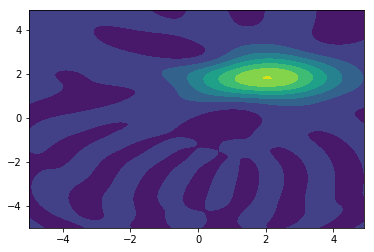

In [17]:
@sf.convert
def custom(x):
    return -x*sqrt(2)


x_ini = 1
p_ini = 0.5
with eng:
    # prepare the initial states
    Coherent(x_ini + p_ini * 1j) | q[0]  # This is the state we want to teleport
    Sgate(-2) | q[1] # momentum squeezed
    Sgate(2) | q[2] # position squeezed
    
    # apply the gates
    BSgate(pi/4, 0) | (q[1], q[2])  # a 50-50 beamsplitter
    BSgate(pi/4, 0) | (q[0], q[1])  # a 50-50 beamsplitter
    
    # perform the homodyne measurements
    MeasureX | q[0]
    MeasureP | q[1]    
    
    # displacement gates conditioned on the measurements
    Xgate(scale(q[0], sqrt(2))) | q[2]
    Zgate(scale(q[1], sqrt(2))) | q[2]
    #Zgate(custom(q[1])) | q[2]
    
state = eng.run('fock', cutoff_dim=15)
print('prepared state : ', x_ini, p_ini)
#print(q[0].val, q[1].val)

x = np.arange(-5, 5, 0.1)
p = np.arange(-5, 5, 0.1)
W = state.wigner(2, x, p)
X, P = np.meshgrid(x, p)
plt.contourf(X, P, W)

# Gaussian backend

telepoted state's mean of x and p
2.0000720604948583 0.9995602243961912
original state's mean of x and p
2.0 1.0


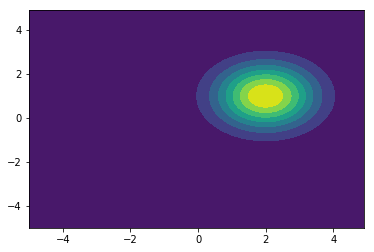

In [32]:
import strawberryfields as sf
from strawberryfields.ops import *
from strawberryfields.utils import scale
from numpy import pi, sqrt
import matplotlib.pyplot as plt

eng_g, q_g = sf.Engine(4)

r = 10 #squeeze Level

x_ini = 1
p_ini = 0.5
with eng_g:
    # prepare the initial states
    Coherent(x_ini + p_ini * 1j) | q_g[0]  # This is the state we will teleport
    Sgate(-r) | q_g[1] # momentum squeezed
    Sgate(r) | q_g[2] # position squeezed
    
    Coherent(x_ini + p_ini * 1j) | q_g[3]  # Same state as q[0] for check
    
    # apply the gates
    BSgate(pi/4, 0) | (q_g[1], q_g[2])  # a 50-50 beamsplitter
    BSgate(pi/4, 0) | (q_g[0], q_g[1])  # a 50-50 beamsplitter
    
    # perform the homodyne measurements
    MeasureX | q_g[0]
    MeasureP | q_g[1]    
    
    # displacement gates conditioned on the measurements
    Xgate(scale(q_g[0], sqrt(2))) | q_g[2]
    Zgate(scale(q_g[1], sqrt(2))) | q_g[2]
    
state_g = eng_g.run('gaussian')
#print('prepared state : ', x_ini, p_ini)
print("telepoted state's mean of x and p")
print(state_g.means()[2], state_g.means()[6])

print("original state's mean of x and p")
print(state_g.means()[3], state_g.means()[7])

x = np.arange(-5, 5, 0.1)
p = np.arange(-5, 5, 0.1)
W_g = state_g.wigner(2, x, p)
X, P = np.meshgrid(x, p)
plt.contourf(X, P, W_g)

2.0 1.0


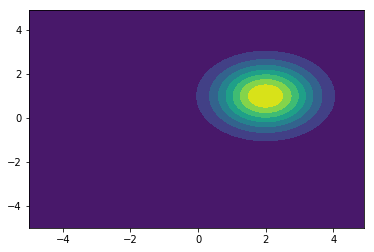

In [2]:
x1 = np.arange(-5, 5, 0.1)
p1 = np.arange(-5, 5, 0.1)
W_ini = state_g.wigner(3, x1, p1)
X1, P1 = np.meshgrid(x1, p1)
plt.contourf(X1, P1, W_ini)

In [27]:
20*np.log10(np.exp(2))

17.371779276130074